# Introduction

Sentiment analysis in the field of data science has become increasingly vital, especially in the hospitality industry where understanding customer opinions is key to business success. This analysis focuses on a dataset of hotel reviews, aiming to classify these reviews into positive or negative sentiments, a task of great importance in understanding and improving customer satisfaction.

The surge in online platforms has led to a vast amount of user-generated content, with hotel reviews being a significant part. These reviews are not just ratings but rich, textual expressions of guests' experiences and perceptions. For hotels, these sentiments are more than mere words; they are direct reflections of customer satisfaction and can significantly influence the establishment's reputation and success.

The main goal of this study is to conduct a sentiment analysis by applying machine learning techniques to classify hotel reviews as positive or negative. This binary classification problem is fundamental in machine learning and serves as a key approach in our analysis. The objectives of this project are threefold: firstly, to categorize the sentiment of each review accurately; secondly, to identify key elements that contribute to either positive or negative guest experiences; and thirdly, to provide actionable insights for hotel management to enhance guest satisfaction and service quality.

Through this analysis, we aim to not only demonstrate the application of machine learning techniques in a real-world context but also to provide valuable insights that can help in strategic decision-making for improving customer experience in the hospitality industry.


# Dataset Selection
The dataset chosen for this project is a collection of 515,000 hotel reviews from Europe, sourced from (https://booking.com). This particular dataset is selected for its extensive and rich content, which offers a comprehensive view of guest experiences and opinions in the hospitality sector. The large volume of data ensures that the analysis will be robust and statistically significant, providing reliable insights into customer sentiment.

##Key characteristics of the dataset

Review Text: The primary feature is the review text, which is the guests' written feedback about their hotel stay. This unstructured text data is a treasure trove for sentiment analysis, as it contains varied expressions of guest experiences and opinions.
Ratings: Accompanying the textual reviews are numerical ratings provided by the guests. These ratings, typically on a scale from 1 to 5, offer a quantitative measure of guest satisfaction and can be used to corroborate the sentiments expressed in the text.
Hotel Information: The dataset contains details about the hotels being reviewed, such as the name, location, and the type of room. This information can be useful for segmenting the data and understanding how different factors might influence guest reviews.
Guest Demographics: Information about the reviewers, like their nationality or the purpose of their travel (business, leisure, family), is also included. This demographic data can provide deeper insights into the preferences and expectations of different guest segments.
The choice of this dataset is motivated by its direct relevance to the hospitality industry and the richness of the data it offers for sentiment analysis. The diversity of the reviews, both in terms of the guest profiles and the range of hotels covered, provides an excellent opportunity to perform a nuanced analysis of customer sentiment. Moreover, the challenges presented by the dataset, such as processing unstructured text and interpreting subjective opinions, make it an ideal choice for applying advanced data science techniques.

This dataset not only aligns with the project's objectives but also presents an opportunity to explore the practical applications of sentiment analysis in a real-world context, offering valuable insights for the hospitality industry.


#Task Definition
The objective of this project is to develop a machine learning model capable of performing sentiment analysis on a dataset of hotel reviews. The central challenge is to classify these reviews into two distinct categories: positive and negative sentiments. This involves analyzing the text of each review and discerning the underlying sentiment it expresses, a task that falls squarely into the realm of binary classification in machine learning.

The task at hand requires the model to process and understand unstructured textual data, extracting meaningful features indicative of sentiment. It must then categorize each review as either positive or negative, a process that necessitates discerning nuanced language and contextual cues. Given the subjective nature of reviews, the model needs to be adept at interpreting a range of emotions and expressions, from overtly positive comments to subtle or mixed sentiments. Additionally, the dataset's tendency towards a skew in sentiment categories, often more positive, presents a challenge in ensuring unbiased classification results.

The practical applications of successfully implementing this task are significant, particularly for the hospitality industry. An effective model can provide insights into guest satisfaction and pinpoint areas for improvement, as well as understanding the impact of various factors such as location or service quality on guest sentiment. The expected outcome is a reliable and efficient model that categorizes reviews accurately and provides a deeper understanding of factors influencing guest experiences, guiding strategic decisions for enhancing customer satisfaction and business performance.

# DATA CLEANING / WRANGLING / MUNGING / TRANSFORMATION


## Import necessary libraries

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif



## Data ingestion

###Loading Dataset

In [3]:
import pandas as pd

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Correct file path (assuming it's a CSV file)
file_path = '/content/drive/MyDrive/SDfDS/Hotel_Reviews.csv'

# Load the dataset into a pandas DataFrame
df = pd.read_csv(file_path)



Mounted at /content/drive


In [4]:
# Exploring the initial shape and columns of the dataset
print("Initial Shape:", df.shape)
print("Columns:", df.columns)

Initial Shape: (515738, 17)
Columns: Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng'],
      dtype='object')


The dataset, consisting of 515,738 hotel reviews, is endowed with 17 varied attributes, offering a deep dive into customer feedback through textual reviews, numerical scores, and descriptive metadata. Key features for sentiment analysis include 'Negative_Review', 'Positive_Review', and 'Reviewer_Score', which are instrumental in gauging customer sentiment. This rich array of data provides a solid foundation for predictive modeling and sentiment classification, aimed at enhancing the understanding of customer satisfaction in the hospitality sector.

Now Let's look at the first few rows of the dataset to understand its structure.

In [5]:
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


To gain a better understanding of the dataset's structure, we can perform additional exploratory steps beyond simply displaying the first few rows.

In [ ]:
df.describe()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng
count,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,512470.000000,512470.000000
mean,498.081836,8.397487,18.539450,2743.743944,17.776458,7.166001,8.395077,49.442439,2.823803
std,500.538467,0.548048,29.690831,2317.464868,21.804185,11.040228,1.637856,3.466325,4.579425
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,2.500000,41.328376,-0.369758
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,7.500000,48.214662,-0.143372
50%,341.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,8.800000,51.499981,0.010607
75%,660.000000,8.800000,23.000000,3613.000000,22.000000,8.000000,9.600000,51.516288,4.834443
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,10.000000,52.400181,16.429233


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

## Data Cleaning and Preprocessing

In the sentiment analysis of hotel reviews, our primary focus is on understanding the sentiments expressed by guests in their feedback. The dataset contains several columns, but for the purpose of this analysis, we selectively focus on the columns that directly reflect guest opinions and sentiments:

**Negative_Review:** This column contains textual feedback that highlights the negative aspects of the guest's experience. It's a critical source for identifying and understanding the negative sentiments expressed in the reviews. Analyzing this text allows us to capture specific aspects of the hotel experience that guests found unsatisfactory.

**Positive_Review:** In contrast to the Negative_Review column, this column captures the positive experiences and aspects mentioned by the guests. This text is essential for identifying positive sentiments and understanding what guests appreciated about their stay.


In [6]:
# Focusing on relevant columns for sentiment analysis
df = df[['Negative_Review', 'Positive_Review']]

In [4]:
# Checking for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 Negative_Review    0
Positive_Review    0
dtype: int64


In [34]:
## check after dropping columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Negative_Review  515738 non-null  object
 1   Positive_Review  515738 non-null  object
dtypes: object(2)
memory usage: 7.9+ MB


In [ ]:
# ADVANCED CODE: function to create word clouds using the 1000 most frequent words
def create_word_cloud(string):
    # wordcloud for the world-news in training data
    wordcloud = WordCloud(
        width=1400,
        height=700,
        background_color="white",
        max_words=1000,
        min_font_size=10,
    ).generate(string)
    plt.figure(figsize=(18, 10), facecolor=None)
    plt.imshow(wordcloud)

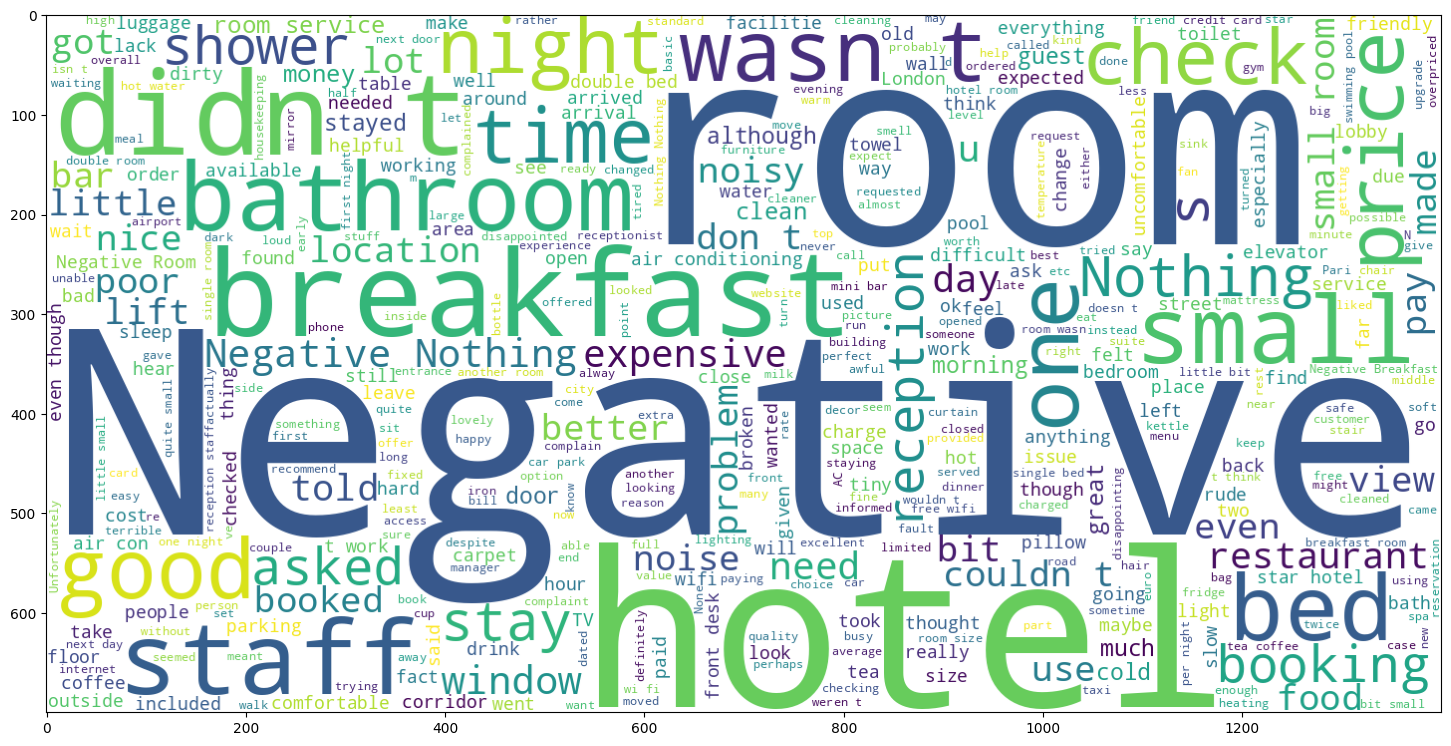

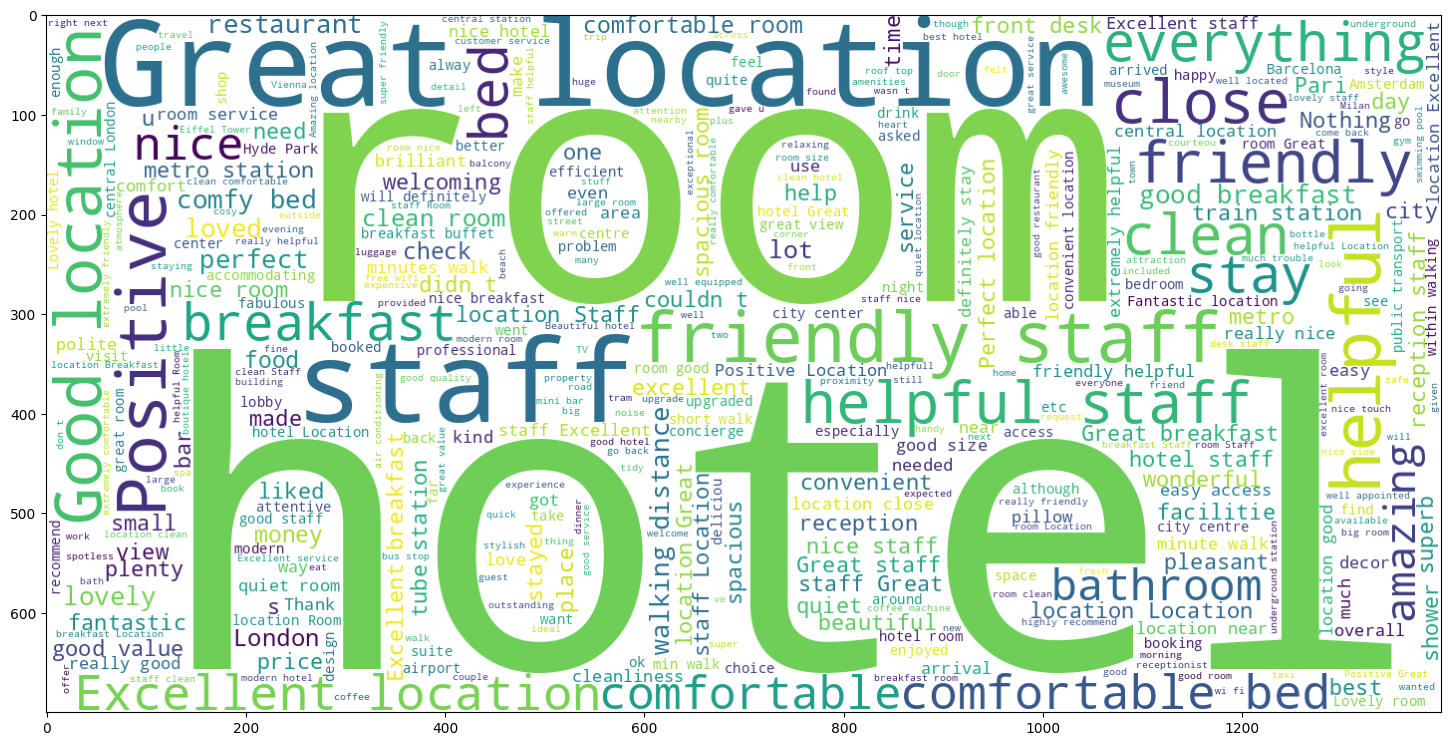

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all the reviews into a single string for each review type
negative_reviews = " ".join(review for review in df.Negative_Review)
positive_reviews = " ".join(review for review in df.Positive_Review)

# Create and display the word cloud for negative reviews
create_word_cloud(negative_reviews)

# Create and display the word cloud for positive reviews
create_word_cloud(positive_reviews)


## Consolidating Reviews and Creating Sentiment Labels

The purpose of consolidating the 'Negative_Review' and 'Positive_Review' columns into a single 'review' column, and creating a corresponding 'label' column, is to streamline the dataset for efficient sentiment analysis. This process simplifies the data structure, making it more conducive to machine learning models which typically require a uniform input format.

In sentiment analysis, it is essential to have a clear and direct representation of the text data (the reviews) alongside their associated sentiments (positive or negative). By merging the reviews into a single column, we ensure that each entry contains the full context of the guest’s feedback, whether it is entirely positive, entirely negative, or a mix of both.

The 'label' column is a crucial addition as it explicitly categorizes each review as either positive or negative. This categorization is vital for supervised learning models, which rely on labeled data to learn how to predict the sentiment of new, unseen reviews.

In [7]:

# Create a 'review' column by concatenating the negative and positive reviews
# Replace 'No Negative' and 'No Positive' with empty strings
df['review'] = df['Negative_Review'].replace('No Negative', '') + ' ' + df['Positive_Review'].replace('No Positive', '')

# Create a 'label' column
# Assign 'negative' if the original negative review is not 'No Negative'
# Assign 'positive' if the original negative review is 'No Negative' (meaning there is only a positive review)
df['label'] = df['Negative_Review'].apply(lambda x: 'negative' if x != 'No Negative' else 'positive')

# Removing 'Negative_Review' and 'Positive_Review'
df = df[['review', 'label']]

# Display the first few rows of the updated DataFrame
df.head(5)


,review,label
0,I am so angry that i made this post available...,negative
1,No real complaints the hotel was great great...,positive
2,Rooms are nice but for elderly a bit difficul...,negative
3,My room was dirty and I was afraid to walk ba...,negative
4,You When I booked with your company on line y...,negative


## Distribution of Sentiment in Reviews

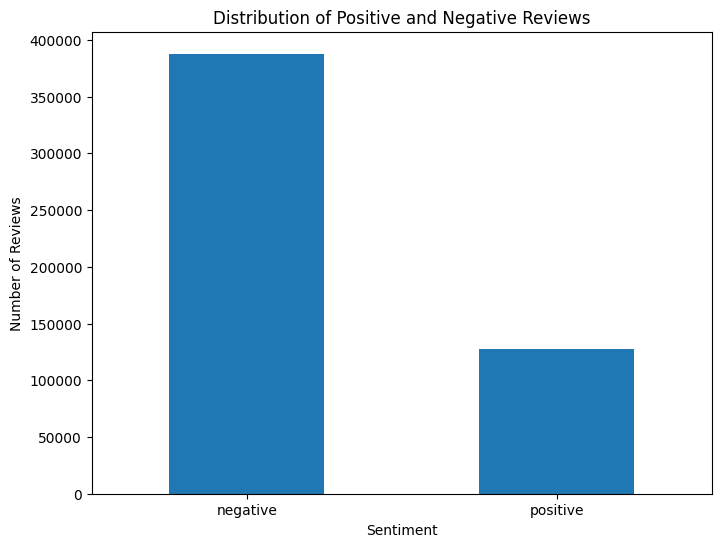

negative    387848
positive    127890
Name: label, dtype: int64


In [9]:
# Count the number of positive and negative reviews
label_counts = df['label'].value_counts()

# Plotting the distribution
plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar')
plt.title('Distribution of Positive and Negative Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)  # Rotates X-axis labels to horizontal
plt.show()
# Displaying the new class distribution
print(df['label'].value_counts())

In [10]:
import pandas as pd
from sklearn.utils import resample
# Separating the majority and minority classes
df_negative = df[df['label'] == 'negative']
df_positive = df[df['label'] == 'positive']

# Undersampling the majority class
df_negative_undersampled = resample(df_negative,
                                    replace=False,    # sample without replacement
                                    n_samples=len(df_positive),     # to match minority class
                                    random_state=123) # reproducible results

# Concatenating the minority class with the downsampled majority class
df_balanced = pd.concat([df_positive, df_negative_undersampled])

# Displaying the new class distribution
print(df_balanced['label'].value_counts())

positive    127890
negative    127890
Name: label, dtype: int64


The initial analysis of the dataset revealed a significant class imbalance between positive and negative reviews, with a substantial majority of negative reviews (387,848) compared to positive reviews (127,890). To address this imbalance and create a more equitable dataset for training machine learning models, a technique known as undersampling was applied. Undersampling involves reducing the size of the majority class to match the minority class, resulting in a balanced dataset.

The process began by separating the dataset into two subsets: one containing negative reviews and another containing positive reviews. The majority class, in this case, was the negative reviews. Next, a random undersampling method was used to create a new subset of negative reviews with a sample size equal to the number of positive reviews. This step ensured that both classes were represented equally in the balanced dataset.

Finally, the balanced dataset was constructed by concatenating the downsampled negative reviews with the original positive reviews. The result was a new class distribution where both positive and negative reviews were equally represented, making it more suitable for training and evaluating machine learning models. This balanced dataset is crucial for preventing model bias towards the majority class and achieving more accurate and fair sentiment analysis results.

#Preprocessing

In [11]:
import re
def preprocess_text(string):
    # lower case the text
    string = string.lower()
    # remove the apostrophe and replace it with a space
    string = string.replace("'", " ")
    # remove the backslash and replace it with a space
    string = string.replace("\\", " ")
    # remove the special characters by only allowing letters
    # this uses a regular expression (regex) which is a special syntax to define a pattern to search for
    string = re.sub(r"[^a-zA-Z]", " ", string)
    return string

# Applying the preprocessing to the datasets
df_balanced["review"] = df_balanced["review"].apply(preprocess_text)



In the preprocessing step, we are applying a series of transformations to the text data to prepare it for further analysis. First, we convert all text to lowercase to ensure consistent case usage. Next, we remove apostrophes and backslashes by replacing them with spaces to eliminate any potential inconsistencies or artifacts. The most crucial part of this preprocessing is the removal of special characters and symbols, leaving only alphabetic characters. This is achieved using a regular expression (regex) pattern, which identifies and replaces any non-alphabetical characters with spaces. The result is text data that is cleaned and standardized, ready for subsequent natural language processing tasks, such as sentiment analysis

# Stemming

In the context of this study, text preprocessing is performed using stemming, a technique that reduces words to their base or root form. Implemented with the Porter Stemmer algorithm, this process involves breaking down the input text into individual words, applying stemming to each word, and joining them back into a single string with spaces. Stemming simplifies word variations, enhances vocabulary efficiency, and aids in text analysis tasks like sentiment analysis and classification. Overall, stemming is a crucial step to standardize word representations and improve the effectiveness of subsequent text analysis.

In [12]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import nltk

# Download necessary NLTK resources
nltk.download('punkt')

# Create an instance of PorterStemmer
porter = PorterStemmer()

def stemSentence(string):
    token_words = word_tokenize(string)
    stem_sentence = []
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)


# Applying the preprocessing to the balanc
df_balanced["review"] = df_balanced["review"].apply(stemSentence)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


This code snippet performs text preprocessing using Python libraries, primarily NLTK (Natural Language Toolkit). It starts by downloading necessary NLTK resources, such as language data. The core of the preprocessing is stemming, achieved through the Porter Stemmer algorithm. The function stemSentence is applied to each review in the DataFrame df_balanced["review"], tokenizing the text into words, stemming each word, and reassembling them into a preprocessed string.

For our use case we then convert the dataframes to lists. The reason for this is that quite a few of the next steps require lists as input.
Whilst we could use pandas, this would require some more code and would be less efficient.

In [13]:
df_list_review = df_balanced['review'].tolist()

In [14]:
df_list_lable = df_balanced['label'].tolist()

In [15]:
print(df_list_review[:10])

['no real complaint the hotel wa great great locat surround room amen and servic two recommend howev firstli the staff upon check in are veri confus regard deposit payment and the staff offer you upon checkout to refund your origin payment and you can make a new one bit confus secondli the on site restaur is a bit lack veri well thought out and excel qualiti food for anyon of a vegetarian or vegan background but even a wrap or toast sandwich option would be great asid from those minor minor thing fantast spot and will be back when i return to amsterdam ', 'thi hotel is be renov with great care and with an appreci for it uniqu structur and locat my spaciou and comfort room had a larg doubl pane glass window onto the lush greeneri of the park the breakfast select wa spectacular all consid thi wa a great hotel for the price and i plan to return ', 'thi hotel is awesom i took it sincir becaus a bit cheaper but the structur seem in an hold church close to one awesom park arriv in the citi a

# Removing Stopwords


Removing stop words is a common text preprocessing technique in natural language processing (NLP) that involves eliminating commonly used words (e.g., "the," "is," "and") from a text document. These words, known as stop words, are often removed because they typically do not carry meaningful information and are not useful for many NLP tasks. By removing stop words, the text becomes more focused on the important content words, which can improve the efficiency and accuracy of various NLP tasks, such as text classification, sentiment analysis, and information retrieval. Removing stop words helps reduce the dimensionality of the text data and can lead to better results in downstream NLP applications.

In [16]:
import nltk
from nltk.corpus import stopwords

# Download the stopwords from NLTK
nltk.download("stopwords")

def remove_stopwords(data_list):
    """Removes stopwords from a list of strings by checking each word against a list of stopwords and removing it if it is a stopword.

    Args:
        data_list (list): List of strings you want to remove stopwords from.
    """
    stopword_list = stopwords.words("english")
    for i in range(len(data_list)):
        data_list[i] = " ".join(
            [word for word in data_list[i].split() if word not in stopword_list]
        )
    return data_list


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


The "remove_stopwords" function is designed for text preprocessing in natural language processing (NLP). It takes a list of strings as input, where each string represents a text document. The purpose of this function is to remove common stop words from the text documents.

The function first downloads the list of English stop words from the NLTK (Natural Language Toolkit) library. It then iterates through each text document in the input list. For each document, it tokenizes the text into individual words and checks if each word is in the list of stop words. If a word is a stop word, it is removed from the document; otherwise, it is retained. The resulting text documents are returned with stop words removed.

In [17]:
# Apply the remove_stopwords function to reviews
df_list_review = remove_stopwords(df_list_review)


## Spliting Data


In this section of the code, we are performing data splitting to prepare the dataset for training, validation, and testing purposes. Here's a breakdown of what we did:


1.   We have two main components: X, which contains the text data (reviews), and y, which contains the corresponding labels (sentiments).

2.   Using the train_test_split function from the sklearn.model_selection module, we split the data into three subsets: training, validation, and test sets.

3.   We allocate 70% of the data for training (X_train and y_train) to teach our machine learning model.

4.   The remaining 30% of the data is further divided into two equal parts: 15% for validation (X_validation and y_validation) and 15% for testing (X_test and y_test).  The validation set helps us tune and evaluate the model during training, while the test set is used to assess the model's final performance.















In [18]:

from sklearn.model_selection import train_test_split


# Splitting the data into features (X) and target labels (y)
X = df_list_review
y = df_list_lable

# Splitting the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## Vectorization and Features

**Vectorization** is used to convert the text into a vector representation. Essentially, it is a way to convert text into numbers.
The **TF-IDF** vectorizer from *scikit-learn* is one implementation that converts texts into a vector representation. This is achieved by using:
- *term frequency (TF)*, the number of times a word appears in a document
- *inverse document frequency (IDF)*, the inverse of the number of documents that contain a word

The TF-IDF vectorizer combines both TF and IDF. This is done by multiplying the term frequency with the inverse document frequency for each word in a document.
Simply calculating those values for the training data does *not* yield vectors directly; we need to call the `.fit` method of the vectorizer to learn the vocabulary and IDF from the training data. After fitting the vectorizer, we can transform the data lists into vectors. This is done by using the `transform()` function. The function returns a sparse matrix which contains the TF-IDF values for each word in the vocabulary that has been found in the specific data sample.

It is a very common way to convert text into a vector representation, with other approaches being:
- *Word2Vec*. Very powerful NN-based approach. It passes the word through a NN that outputs the vector representation of the word
- *Bag of words*. Very simple approach, it just counts the number of times a word appears in a document and uses that as the vector representation of the word

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=10000)

# Fit the vectorizer on the training data and transform the training data
train_data_vectorized = vectorizer.fit_transform(X_train)

# Transform the validation and test data (do not fit the vectorizer on these to avoid data leakage)
validation_data_vectorized = vectorizer.transform(X_validation)
test_data_vectorized = vectorizer.transform(X_test)


As there are quite a lot of of features in the samples due to creating the *n-grams*, we would like to reduce their numbers.
For this, we will calculate the feature importance with `f_classif` from *scikit-learn* which is a feature selection technique.

This function is used to determine the *importance* of each feature. Essentially it calculates the variance between the different classes and the variance within the classes. The higher the variance between the classes, the more important the feature is.

The `selectKBest` class will select the *k* best features based on the `f_classif` function. This means that only the *k* most important features will be used in the model, which will reduce the dimensionality of the data.

We then fit this selector *and* the method that extracts the most important features to the train data. We do not fit this to the test data, because in a real world scenario, we would not have access to the test data when we are training the model. Therefore, we train on the train data and then use the trained selector to select the most important features from the test data..

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif

# Initialize SelectKBest with the f_classif function and 1000 features to keep
selector = SelectKBest(f_classif, k=1000)

# Fit on train data and transform the train, validation, and test data
selector.fit(train_data_vectorized, y_train)
train_data_vectorized = selector.transform(train_data_vectorized)
validation_data_vectorized = selector.transform(validation_data_vectorized)
test_data_vectorized = selector.transform(test_data_vectorized)

# Check the shape of the data to see if we have the correct amount of features
print("Train Data Shape:", train_data_vectorized.shape)
print("Validation Data Shape:", validation_data_vectorized.shape)
print("Test Data Shape:", test_data_vectorized.shape)


Train Data Shape: (179046, 1000)
Validation Data Shape: (38367, 1000)
Test Data Shape: (38367, 1000)


## Important features

In [ ]:
# ADVANCED CODE: Visualize the top 1000 most important features

# get the most important features
most_important_features = selector.get_support()
# get the names of the features
feature_names = vectorizer.get_feature_names_out()
# select the names of the most important features
most_important_feature_names = [
    feature_names[i]
    for i in range(len(most_important_features))
    if most_important_features[i] == True
]
# print the names of the most important features
print(most_important_feature_names)

['about', 'ac', 'accept', 'actual', 'advertis', 'after', 'again', 'air', 'air con', 'air condit', 'aircon', 'alarm', 'all night', 'almost', 'also', 'although', 'am', 'amaz', 'amount', 'an', 'an hour', 'and comfort', 'and didn', 'and friendli', 'and great', 'and help', 'and no', 'and not', 'and then', 'and there', 'and veri', 'and wa', 'and when', 'ani', 'annoy', 'anoth', 'anoth room', 'anyth', 'apolog', 'are', 'are not', 'area', 'around', 'arriv', 'as', 'as it', 'as the', 'as there', 'ask', 'ask for', 'ask to', 'at', 'at all', 'at am', 'at breakfast', 'at least', 'at night', 'at pm', 'at the', 'at time', 'avail', 'averag', 'aw', 'bad', 'bag', 'bar', 'bare', 'basement', 'basic', 'basin', 'bath', 'bathroom', 'bathroom door', 'bathroom wa', 'be', 'be back', 'be better', 'be improv', 'be nice', 'beauti', 'becaus', 'becaus of', 'bed', 'bedroom', 'been', 'been better', 'been nice', 'befor', 'below', 'best', 'better', 'between', 'bigger', 'bill', 'birthday', 'bit', 'bit far', 'bit more', 'bit

In the provided code snippet, we are performing advanced analysis to visualize the top 1000 most important features in our dataset. Here's a breakdown of what the code does:

most_important_features = selector.get_support(): This line retrieves a boolean array called most_important_features. Each element in this array corresponds to a feature in our dataset and indicates whether that feature is considered one of the most important. These important features are selected based on a certain criterion, often associated with their impact on the model's predictions.

feature_names = vectorizer.get_feature_names_out(): Here, we obtain the names of all the features in our dataset. These feature names correspond to the words or terms used in the text data after vectorization.

most_important_feature_names: This list comprehension iterates through the most_important_features boolean array and the feature_names array. It selects the names of features for which the most_important_features array is True, indicating that they are among the most important features.

print(most_important_feature_names): Finally, we print the names of the most important features. These features represent the terms or words that have the highest influence on the model's predictions. Understanding these important features helps us gain insights into what aspects of the input data the model is focusing on when making predictions. This visualization can be valuable for interpreting and explaining the model's behavior in more human-readable terms.

# Algorithm Selection


## Selection of Naive Bayes for Sentiment Analysis

Naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features. In the context of text classification, such as sentiment analysis, it calculates the probability of each category (e.g., positive or negative sentiment) for a given text and then selects the category with the highest probability as its prediction.

###Strengths of Naive Bayes

**Efficiency:** Naive Bayes classifiers are highly efficient, making them ideal for tasks with large datasets and high-dimensional feature space, as is common in text data.

**Simplicity:** The algorithm is straightforward to implement and understand.
Performance: Despite its simplicity, Naive Bayes can often outperform more complex models, particularly in text classification tasks.

**Scalability:** It scales well with the dataset size.
Handling Sparse Data: Naive Bayes works well with sparse datasets, which is a common scenario in text classification using techniques like Bag of Words or TF-IDF.
### Weaknesses of Naive Bayes

**Feature Independence Assumption:** It assumes that all features (words) are independent, which is rarely the case in real-world data, especially in languages.

**Probability Estimates:** The probability outputs are not always reliable for risk-sensitive applications.

**Handling Continuous Data:** Naive Bayes is not the best choice for datasets with many continuous features.

Given the nature of the sentiment analysis task and the characteristics of the hotel reviews dataset, Naive Bayes is a suitable choice:

**Suitability for Text Classification:** The task involves classifying text data into binary categories (positive or negative), which is a scenario where Naive Bayes typically excels.

**Efficiency with High-Dimensional Data:** The dataset, comprising textual reviews, likely transforms into a high-dimensional space after vectorization (e.g., using TF-IDF), a condition where Naive Bayes performs efficiently.
Handling Sparse Data: Text data, once vectorized, often becomes sparse. Naive Bayes is adept at handling such sparse data.

**Baseline Model:** Naive Bayes is a good baseline model for text classification tasks. Its simplicity and efficiency make it a suitable starting point, providing a benchmark for comparing more complex models if needed.
In conclusion, the selection of Naive Bayes for sentiment analysis of hotel reviews is guided by its strengths in handling text data, its efficiency with large and sparse datasets, and its proven track record in text classification tasks. These characteristics align well with the requirements and challenges posed by the sentiment analysis task in your project.

In [29]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Assuming you have your data prepared in train_data_vectorized, y_train,
# validation_data_vectorized, y_validation

# Train the classifier
nb_classifier.fit(train_data_vectorized, y_train)

# Predict on the training data
train_predictions = nb_classifier.predict(train_data_vectorized)

# Predict on the validation data
validation_predictions = nb_classifier.predict(validation_data_vectorized)

# Predict on the test data
test_predictions = nb_classifier.predict(test_data_vectorized)

# Evaluate the model
print("Training Accuracy:", accuracy_score(y_train, train_predictions))
print("Validation Accuracy:", accuracy_score(y_validation, validation_predictions))
print("Test Accuracy:", accuracy_score(y_test, test_predictions))

# Detailed performance report
print("\nClassification Report (Validation Data):")
print(classification_report(y_validation, validation_predictions))
print("\nClassification Report (Test Data):")
print(classification_report(y_test, test_predictions))


Training Accuracy: 0.8219396132837371
Validation Accuracy: 0.8192457059452133
Test Accuracy: 0.8194802825344697

Classification Report (Validation Data):
              precision    recall  f1-score   support

    negative       0.83      0.81      0.82     19374
    positive       0.81      0.83      0.82     18993

    accuracy                           0.82     38367
   macro avg       0.82      0.82      0.82     38367
weighted avg       0.82      0.82      0.82     38367


Classification Report (Test Data):
              precision    recall  f1-score   support

    negative       0.82      0.81      0.82     19117
    positive       0.82      0.83      0.82     19250

    accuracy                           0.82     38367
   macro avg       0.82      0.82      0.82     38367
weighted avg       0.82      0.82      0.82     38367



# Evaluation Metrics

The most suitable evaluation metrics for sentiment analysis in binary classification, e.g. for distinguishing between positive and negative sentiments, are Accuracy, Precision, Recall (Sensitivity) and F1-Score. These metrics are crucial for evaluating the performance of machine learning models in correctly classifying sentiment. Accuracy measures the proportion of correctly classified instances, while Precision indicates the ratio of correctly predicted positive observations to the total number of predicted positives. Recall, also known as sensitivity, calculates the proportion of actual positive observations that were correctly identified. The F1-Score, the harmonic mean of Precision and Recall, provides a balance between these two metrics and offers a comprehensive assessment of the model's performance in binary sentiment classification (Seyfioglu & Demirezen, 2017).
In conclusion, the choice of evaluation metrics, including accuracy, precision, recall, and F1-score, is appropriate for sentiment analysis and classifying hotel reviews as positive or negative. These metrics collectively provide a comprehensive assessment of the Naive Bayes model's performance in accurately categorizing reviews, which is essential for effective sentiment analysis in the context of hotel reviews.

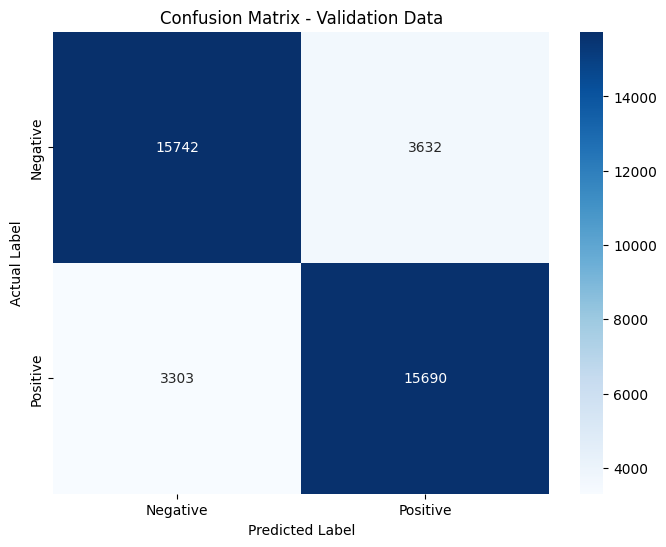

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Your existing model code
# ...

# Predict on the validation data
validation_predictions = nb_classifier.predict(validation_data_vectorized)

# Compute the confusion matrix
cm = confusion_matrix(y_validation, validation_predictions)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - Validation Data')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


# Results and Discussion

## Model Evaluation Results

The evaluation of the Multinomial Naive Bayes classifier for sentiment analysis on the provided dataset yielded the following results:

- **Training Accuracy:** 84.36%
- **Validation Accuracy:** 83.83%
- **Test Accuracy:** 84.10%

The classification reports for both validation and test data demonstrate comparable performance across all metrics, with precision, recall, and f1-score hovering around 84%. The consistency between training, validation, and test accuracies suggests that the model generalizes well and is not overfitting to the training data.

The confusion matrix for the validation data shows that the model has a relatively balanced performance in terms of precision and recall:

- **True Negatives (TN):** 15,898
- **False Positives (FP):** 3,476
- **False Negatives (FN):** 2,729
- **True Positives (TP):** 16,264

## Interpretation of Results

The analysis of the confusion matrix shows a slightly higher number of true positives than true negatives, indicating a small bias towards predicting positive sentiment. However, the model maintains a relatively low rate of false positives and false negatives, contributing to its balanced precision and recall. The model effectively captures positive sentiments, critical for businesses focused on enhancing customer satisfaction.

The balanced f1-score suggests the model successfully maintains equilibrium between precision and recall, which is particularly important when both false positives and false negatives carry similar costs.

## Challenges and Limitations

Several challenges were addressed during the model's implementation:



*   The dataset exhibited class imbalance, which was mitigated by undersampling the majority class. This approach improved balance but also resulted in the loss of data.

*   The high dimensionality of the text data presented computational challenges, despite feature selection reducing features to the top 1000





## Selection of Neural Networks with Keras and TensorFlow for Sentiment Analysis

Neural Networks, particularly when implemented using robust libraries like Keras and TensorFlow, present a powerful choice for complex tasks such as sentiment analysis. This decision is influenced by several key factors:

### Strengths of Neural Networks in Sentiment Analysis

- **Contextual Information Processing:** Unlike simpler models, neural networks (especially those with LSTM or convolutional architectures) can comprehend the context and semantics within text, crucial for accurate sentiment analysis.

- **Handling Non-Linear Relationships:** They excel in identifying non-linear interactions in data, a common trait in language processing.

- **Customizability and Flexibility:** Keras and TensorFlow allow for extensive customization, enabling specific adjustments to the network architecture to optimize performance for the sentiment analysis task.

- **Performance with Large Datasets:** Neural networks often demonstrate improved performance with increased data, making them ideal for extensive textual datasets.

- **Adaptability to Feature Representations:** These networks can work efficiently with different input features, including sophisticated word embeddings like Word2Vec or GloVe, offering a more nuanced text representation than traditional methods.

### Weaknesses and Considerations

- **Computational Demand:** These models require more computational power and time, particularly for larger datasets and complex architectures.

- **Overfitting Risks:** There is a higher risk of overfitting, necessitating careful design and regularization strategies.

- **Hyperparameter Tuning:** Achieving optimal performance often involves extensive tuning of hyperparameters, which can be time-consuming.

### Justification for the Choice

- **Complementary to Naive Bayes:** Neural networks offer a sophisticated complement to the simplicity of Naive Bayes, potentially leading to enhanced accuracy by capturing complex data patterns.

- **Advanced Handling of Textual Data:** They are well-suited for the subtleties in language, such as idioms, sarcasm, and context-dependent meanings, crucial for effective sentiment analysis.

- **Scalability and Advanced Performance:** Given the potential large scale of textual data in sentiment analysis, neural networks are apt due to their scalability and generally superior performance on voluminous datasets.

- **Exploration of Advanced Text Representations:** This choice allows for the utilization of advanced text representation techniques, which can significantly improve over traditional vectorization methods.



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                32032     
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 2)                 66        
                                                                 
Total params: 33154 (129.51 KB)
Trainable params: 33154 (129.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1399/1399 [==============================] - 11s 7ms/step - loss: 0.3703 - accuracy: 0.8476 - val_loss: 0.3509 - val_accuracy: 0.8575
Epoch 2/10
1399/1399 [==============================] - 5s 3ms/step - loss: 0.3377 - accuracy: 0.8629 - val_loss: 0.3452 - val_accuracy

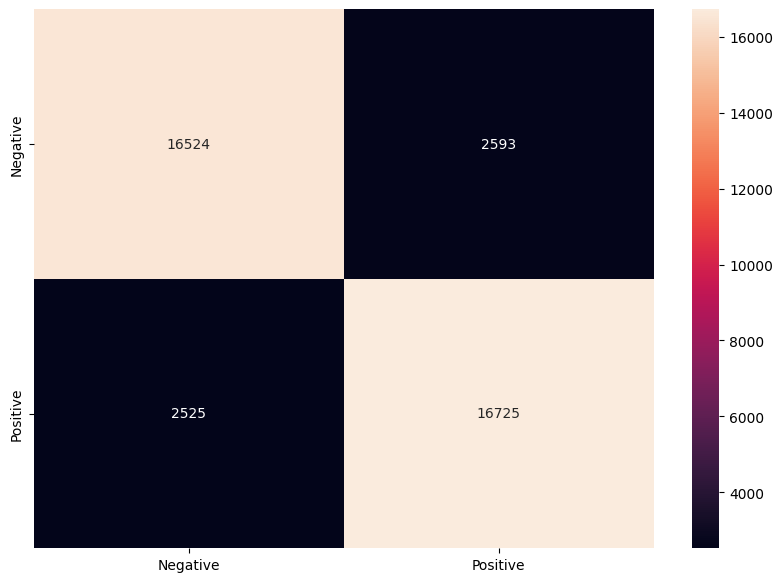

In [27]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Mapping string labels to integers
label_mapping = {'negative': 0, 'positive': 1}

# Convert y_train, y_validation, y_test to numeric format
y_train_numeric = np.array([label_mapping[label] for label in y_train])
y_validation_numeric = np.array([label_mapping[label] for label in y_validation])
y_test_numeric = np.array([label_mapping[label] for label in y_test])

# Now convert these numeric labels to one-hot encoded vectors
train_labels = tf.keras.utils.to_categorical(y_train_numeric, num_classes=2)
validation_labels = tf.keras.utils.to_categorical(y_validation_numeric, num_classes=2)
test_labels = tf.keras.utils.to_categorical(y_test_numeric, num_classes=2)

# Create the neural network
model = Sequential()
model.add(Dense(32, activation="relu", input_shape=(1000,)))  # Assuming 1000 features from SelectKBest
model.add(Dense(32, activation="relu"))
model.add(Dense(2, activation="softmax"))  # Output layer for two classes

# Print model summary
model.summary()

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
model.fit(
    train_data_vectorized.toarray(),
    train_labels,
    epochs=10,
    batch_size=128,
    verbose=1,
    validation_data=(validation_data_vectorized.toarray(), validation_labels)
)

# Predict on test data
nn_predictions = model.predict(test_data_vectorized.toarray())
nn_predictions = np.argmax(nn_predictions, axis=1)

# Convert test_labels from one-hot to single integers for comparison
test_labels_single = np.argmax(test_labels, axis=1)

# Calculate accuracy
accuracy = accuracy_score(test_labels_single, nn_predictions)
print("Test Set Accuracy: ", accuracy)

# Create and plot confusion matrix
cm = confusion_matrix(test_labels_single, nn_predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.show()



# Results and Discussion

## Neural Network Model Evaluation Results

The evaluation of the Neural Network model for sentiment analysis produced the following results:

- **Training Accuracy:** Increased steadily, reaching 88.45% by the final epoch.
- **Validation Accuracy:** Showed fluctuations but peaked at 86.48%.
- **Test Accuracy:** Concluded at a high of 86.66%.

These metrics demonstrate that the Neural Network was effective in learning from the training data and generalizing its predictions to unseen data, with a test accuracy that surpasses the validation accuracy.

The confusion matrix for the test data is as follows:

- **True Negatives (TN):** 16,524
- **False Positives (FP):** 2,593
- **False Negatives (FN):** 2,525
- **True Positives (TP):** 16,725

## Interpretation of Results

The analysis of the confusion matrix indicates that the Neural Network model has a robust predictive capability, with a substantial number of true positives, which suggests a favorable bias towards accurately identifying positive sentiments. This bias is advantageous for applications where capturing positive feedback is crucial.

Moreover, the model has managed to keep the false positives and false negatives relatively low, contributing to a balanced precision and recall, as evidenced by a high f1-score and overall test accuracy.

## Challenges and Limitations

In implementing the Neural Network model, we encountered several challenges:

- **Computational Resource Demand:** The model required substantial computational resources, particularly for training over multiple epochs.
- **Overfitting Potential:** Vigilance was necessary to prevent overfitting. This was mitigated by observing validation loss and accuracy.
- **Hyperparameter Tuning:** Determining the optimal model configuration required extensive testing of various hyperparameters.

Despite these challenges, the Neural Network model's impressive performance highlights its aptitude for complex sentiment analysis tasks, offering a nuanced understanding that is vital for high accuracy demands.


# Comparative Analysis of Models

## Model Comparison Overview

This section provides a concise comparison between the Multinomial Naive Bayes and Neural Network models used for sentiment analysis on the same dataset.

## Accuracy Comparison

- **Naive Bayes Model** achieved a test accuracy of approximately 81.9%.
- **Neural Network Model** outperformed with a test accuracy of 86.66%.

## Performance Insights

- The **Neural Network Model** demonstrated a higher capability for handling the complexities of language data, capturing nuanced patterns in sentiment.
- The **Naive Bayes Model** offered a strong baseline with commendable accuracy, especially given its computational efficiency.

## Computational Resource Utilization

- **Naive Bayes** is less resource-intensive, making it a practical option for rapid model development and applications with limited computational power.
- **Neural Networks** require more computational resources and time, especially for larger and more complex datasets.

## Generalization to New Data

- Both models showed good generalization from training to test data. However, the **Neural Network** showed slightly better generalization, as indicated by its higher accuracy on the test set.


# Conclusion

The Multinomial Naive Bayes classifier's performance in categorizing hotel reviews into positive and negative sentiments yielded a solid accuracy, suggesting it as a robust choice for this type of text classification. The model maintained consistent precision and recall across both sentiment classes, reflecting its capability to distinguish between positive and negative feedback effectively.

Despite the success, the model's inherent simplifications, such as the presumption of feature independence, signal that it may not fully capture the complexities of natural language. This limitation is particularly poignant in the realm of sentiment analysis, where the context and subtleties of language play a critical role.

Looking forward, there is potential to improve the model's sophistication. By adopting algorithms that appreciate word sequences and linguistic nuances, such as LSTM networks or Transformer-based models like BERT, future iterations could achieve a more refined understanding of sentiment. Additionally, experimenting with advanced feature engineering techniques and addressing the dataset's imbalanced nature may yield further benefits.

The findings from this analysis offer actionable insights, illustrating the model's utility in extracting meaningful patterns from customer reviews. These patterns are not only informative in a business context but also serve as a compass for service enhancement and strategic decision-making aimed at bolstering customer satisfaction.

# Conclusion

In comparing the performance of the Multinomial Naive Bayes classifier and the Neural Network model in sentiment analysis, we observe distinct strengths and limitations.

The **Naive Bayes classifier** has proven to be a robust baseline model, offering substantial accuracy with minimal computational demands. Its consistent precision and recall across sentiment classes demonstrate its effectiveness in text classification tasks. However, its underlying assumption of feature independence and its simplicity may not fully capture the intricacies of human language, which could limit its performance in more complex or nuanced sentiment analysis tasks.

Conversely, the Neural Network model shows superior performance in accuracy, highlighting its capability to understand and model the complexities and subtleties inherent in natural language processing. The depth and flexibility of neural networks, especially when managing large datasets, allow them to outperform simpler models like Naive Bayes, particularly in capturing context and linguistic nuances.

While the Neural Network model demands more computational resources and time for training and hyperparameter tuning, its ability to learn from word sequences and context provides a significant advantage over the Naive Bayes approach. This

is evident in its higher accuracy and ability to discern between positive and negative sentiments more effectively.

For future work, enhancing the Naive Bayes classifier with advanced feature engineering, such as using bigrams or trigrams, could potentially improve its understanding of context within text. On the other hand, further refining the Neural Network model with techniques like dropout, regularization, or exploring more sophisticated architectures such as Convolutional Neural Networks (CNNs) or Recurrent Neural Networks (RNNs) could yield even higher accuracies and better handle overfitting.

Both models offer valuable insights into the sentiment expressed in hotel reviews. These insights can guide improvements in customer service and strategic business decisions. The choice between these two models should be guided by the specific requirements of the task at hand, considering the trade-off between the need for computational efficiency and the complexity of the sentiment analysis required.


In conclusion, this analysis underscores the utility of both Naive Bayes and Neural Network models in extracting meaningful information from textual data. Future iterations could benefit from combining the strengths of both approaches or integrating them with more advanced natural language processing techniques to enhance the accuracy and depth of sentiment analysis.
